In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [5]:
file_path = '/kaggle/input/semantic-textual-relatedness-data/gen_data/sentence_score_higher_order.csv'
data = pd.read_csv(file_path)
data

,Score,sentence1,sentence2,Dice,Jaccard,Cosine:1,Euclidean:1,Manhattan:1,Mahalanobis:1,Cosine:2,...,Manhattan:8,Mahalanobis:8,Cosine:9,Euclidean:9,Manhattan:9,Mahalanobis:9,Cosine:10,Euclidean:10,Manhattan:10,Mahalanobis:10
0,0.25,"@HillaryClinton Did your rich Saudi donors, wh...",@SCOTUS_Scalia Right. Words no longer have mea...,0.07,0.07,0.184762,1.276901,19.846790,1.414214,0.325649,...,0.000004,1.414214,0.001747,1.868462e-07,5.701693e-07,1.414214,0.000825,3.107692e-08,8.473509e-08,1.414214
1,0.69,No consensus exists as to when the French Revo...,Napoleonic Wars The Napoleonic Wars are wars t...,0.13,0.15,0.513077,0.986837,15.028084,1.416056,0.501540,...,0.000003,1.414214,0.029539,1.187268e-07,3.869508e-07,1.416458,0.022250,1.872700e-08,5.451282e-08,1.411901
2,0.16,Three greyhounds racing on a track,Three people sitting down at a small table.,0.13,0.15,0.107595,1.335968,21.587475,1.414214,0.309689,...,0.000003,1.414788,0.000020,1.596873e-07,4.381716e-07,1.412329,0.000149,2.680857e-08,6.319730e-08,1.414117
3,0.28,i loved that both the lead male and female wer...,I can't remember if I read Darkfever first or ...,0.13,0.15,0.259650,1.216840,18.884087,1.414214,0.395763,...,0.000005,1.414473,0.041575,1.936552e-07,7.128993e-07,1.414214,0.035866,3.145997e-08,1.056714e-07,1.420202
4,0.59,In this book Percy Jackson is telling the tale...,I was never a fan of Percy Jackson because of ...,0.17,0.21,0.629683,0.860601,13.320730,1.414214,0.570028,...,0.000002,1.414214,0.338130,6.340043e-08,2.550239e-07,1.408653,0.333757,9.256679e-09,3.365347e-08,1.414559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,0.50,Make the breadcrumb too small and he might mis...,he could miss too much.,0.24,0.31,0.451991,1.046908,16.174614,1.414214,0.550641,...,0.000004,1.415278,0.897002,3.198750e-07,6.521938e-07,1.413490,0.921486,6.613976e-08,1.133080e-07,1.413276
4396,0.50,It didn't flow very nicely and I was a little ...,"It was magical and full of wonder, just like i...",0.16,0.19,0.499922,1.000078,15.949434,1.414214,0.451713,...,0.000002,1.414311,0.017582,8.763722e-08,3.187122e-07,1.397817,0.010960,1.309811e-08,4.302784e-08,1.414811
4397,0.44,@realDonaldTrump you work on the Mexican wall ...,@realDonaldTrump gonna be on @greta show right...,0.17,0.21,0.444753,1.053800,16.441090,1.414214,0.445122,...,0.000005,1.414214,0.021168,5.245264e-07,8.345100e-07,1.414214,0.014613,1.040559e-07,1.478566e-07,1.414205
4398,0.44,"In managing NGOs, the Chinese government is to...",neither the Chinese government nor the exporti...,0.16,0.19,0.345575,1.144050,18.188932,1.414214,0.414238,...,0.000003,1.417013,0.012459,1.053893e-07,3.689597e-07,1.415627,0.007182,1.652442e-08,5.032946e-08,1.413929


In [9]:
X = data.iloc[:, -42:].values  # Independent variables
y = data['Score'].values  # Dependent variable

from sklearn.preprocessing import MinMaxScaler

print(y.shape)
print(X.shape)

(4400,)
(4400, 42)


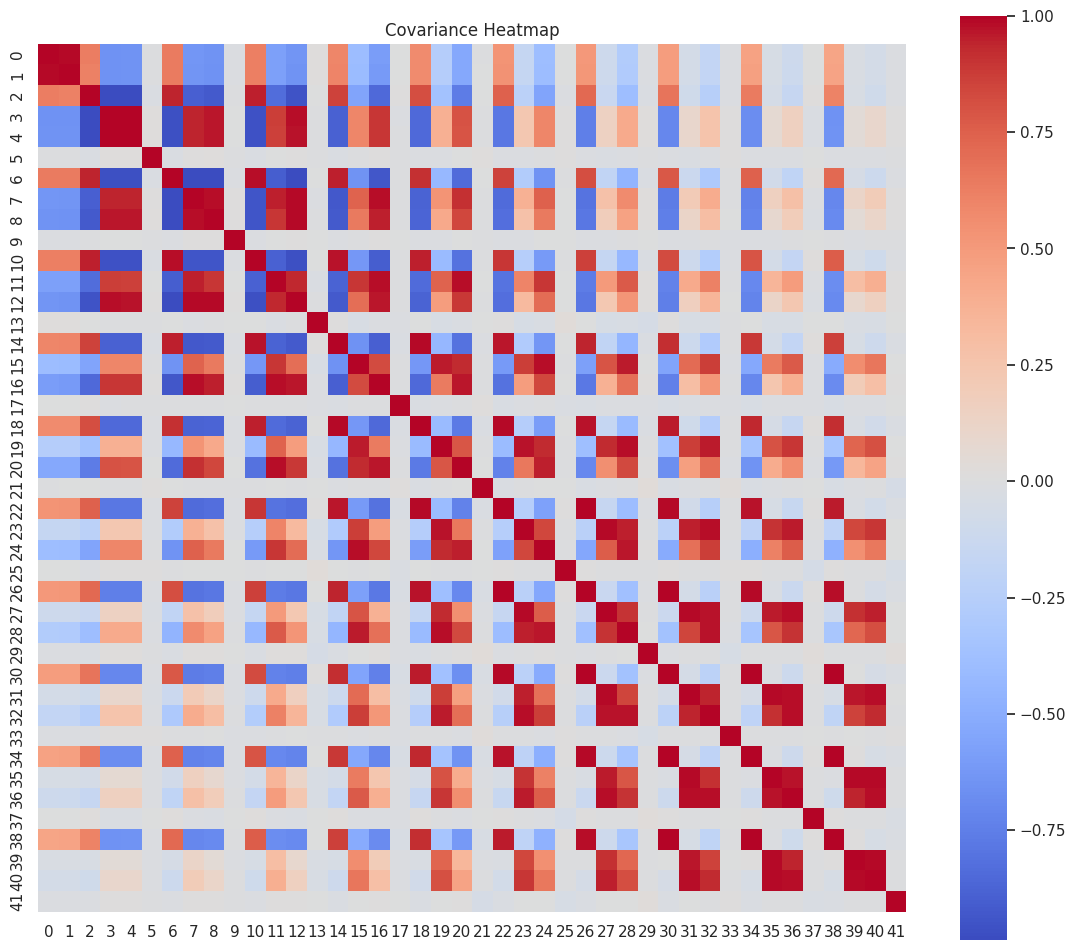

In [10]:
# Calculate the covariance matrix
cov_matrix = np.corrcoef(X, rowvar=False)

# Create a heatmap of the covariance matrix using Seaborn
sns.set(style="white")  # Set the style of the plot

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cov_matrix, cmap='coolwarm', cbar=True, square=True)

plt.title('Covariance Heatmap')
plt.show()

In [11]:
correlation, p_value = spearmanr(X[:,2], y)
print(correlation)

0.8111263456710536


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
    X_train

array([[1.50000000e-01, 1.70000000e-01, 4.07153930e-01, ...,
        2.31319106e-08, 5.95688120e-08, 1.41496044e+00],
       [2.90000000e-01, 4.10000000e-01, 1.59192580e-01, ...,
        1.80702756e-07, 3.20508630e-07, 1.40684952e+00],
       [2.00000000e-01, 2.50000000e-01, 1.24678560e-01, ...,
        1.30640565e-08, 4.16336550e-08, 1.41216787e+00],
       ...,
       [1.70000000e-01, 2.10000000e-01, 7.79666000e-01, ...,
        1.09753442e-08, 3.47880800e-08, 1.41320356e+00],
       [9.00000000e-02, 1.00000000e-01, 5.72846700e-01, ...,
        2.50996717e-08, 6.53802200e-08, 1.41388906e+00],
       [8.00000000e-02, 8.00000000e-02, 3.70797280e-01, ...,
        7.88258205e-08, 1.22256320e-07, 1.41418986e+00]])

In [16]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [17]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [18]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim, weight_decay=1e-5):  # Adjust weight_decay as needed
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer
        self.regularization = nn.MSELoss()  # L2 regularization term

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)

        return x

In [19]:
model = RegressionModel(input_dim=42, weight_decay=1e-5).to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

In [22]:
# Initialize lists to store correlations
train_corrs = []
test_corrs = []

# Define your training and test data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 100

for epoch in range(num_epochs):
    # Training loop
    model.train()
    output = []
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        output.append(outputs)
        loss = criterion(outputs.flatten(), targets)  # Add regularization term
        loss.backward()
        optimizer.step()
    
    # Convert the list of CUDA tensors to NumPy arrays
    numpy_arrays = [tensor.detach().cpu().numpy() for tensor in output]
    long_array = np.concatenate(numpy_arrays, axis=0)
    
    scaler = MinMaxScaler()
    standardized_array = scaler.fit_transform(long_array)
    
    # Calculate the Spearman's rank correlation coefficient for training data
    correlation, _ = spearmanr(standardized_array.flatten(), y_train)
    train_corrs.append(correlation)

    # Testing loop
    model.eval()
    output = []
    val_loss = 0
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs.flatten(), targets)
        val_loss += loss.item()
        output.append(outputs)
    avg_val_loss = val_loss/ len(test_loader)
    # Convert the list of CUDA tensors to NumPy arrays
    numpy_arrays = [tensor.detach().cpu().numpy() for tensor in output]
    long_array = np.concatenate(numpy_arrays, axis=0)

    scaler = MinMaxScaler()
    standardized_array = scaler.fit_transform(long_array)

    # Calculate the Spearman's rank correlation coefficient for test data
    correlation, _ = spearmanr(standardized_array.flatten(), y_test)
    test_corrs.append(correlation)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Val loss: {avg_val_loss}, Train Spearman\'s R: {train_corrs[-1]}, Test Spearman\'s R: {test_corrs[-1]}', end='\r')

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs+1) 

# Create the plot
plt.plot(epochs, corrs, marker='o', linestyle='-')
plt.title('R vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('R')
plt.grid(True)

# Show or save the plot
plt.show() 

In [ ]:
output = []
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
with torch.no_grad():
    total_mse = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        output.append(outputs)

In [ ]:
numpy_arrays = [tensor.numpy() for tensor in output]
for i in numpy_arrays:
    print(i.shape)
long_array = np.concatenate(numpy_arrays, axis=0)

print(long_array.shape)

In [ ]:
from scipy.stats import spearmanr

scaler = MinMaxScaler()
standardized_array = scaler.fit_transform(long_array)

# Flatten the (880, 1) array to (880,) if needed
array1 = standardized_array.flatten()
print(array1)
# Calculate the Spearman's rank correlation coefficient
correlation, p_value = spearmanr(array1, y_test)
print(correlation)